In [ ]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

import os
from _data_provider.data_loader_wq import get_ydata, get_xdata
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

root_path = "dataset/Water_Week"

dir_list = sorted(os.listdir(root_path))

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


## `get_df_loc`
- **returns**: 한 지점 컬럼의 CSV 파일 단위  평균값과 그 지점의 target값을 concat한 `pd.DataFrame`

In [ ]:
def get_df_loc(dir:str):
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))
    df_loc = pd.DataFrame()
    for file in data_list:
        df_ = pd.read_csv(file)
        in_cols, _, df_target = get_ydata(root_path, dir)
        df_target.columns = [f"df_target['{target}']" for target in df_target.columns] 
        features = df_.columns.intersection(in_cols)
        x_data = df_[features]
        df_mean = pd.DataFrame(x_data.mean())
        df_loc = pd.concat([df_loc, df_mean], axis=1, ignore_index=True)
    df_loc = pd.concat([df_loc.T, df_target], axis=1, ignore_index=False)

    return df_loc 

## `plot_heatmap`
- returns: 지점의 PCC heatmap

In [ ]:
def plot_heatmap(dir:str):
    df = get_df_loc(dir)
    mask = np.zeros_like(df.corr(method="pearson"), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20, 10))
    sns.heatmap(df.corr(method="pearson"), annot=True, mask=mask)
    plt.title(f"Pointwise PCC of {dir[:4]}")
    plt.show()

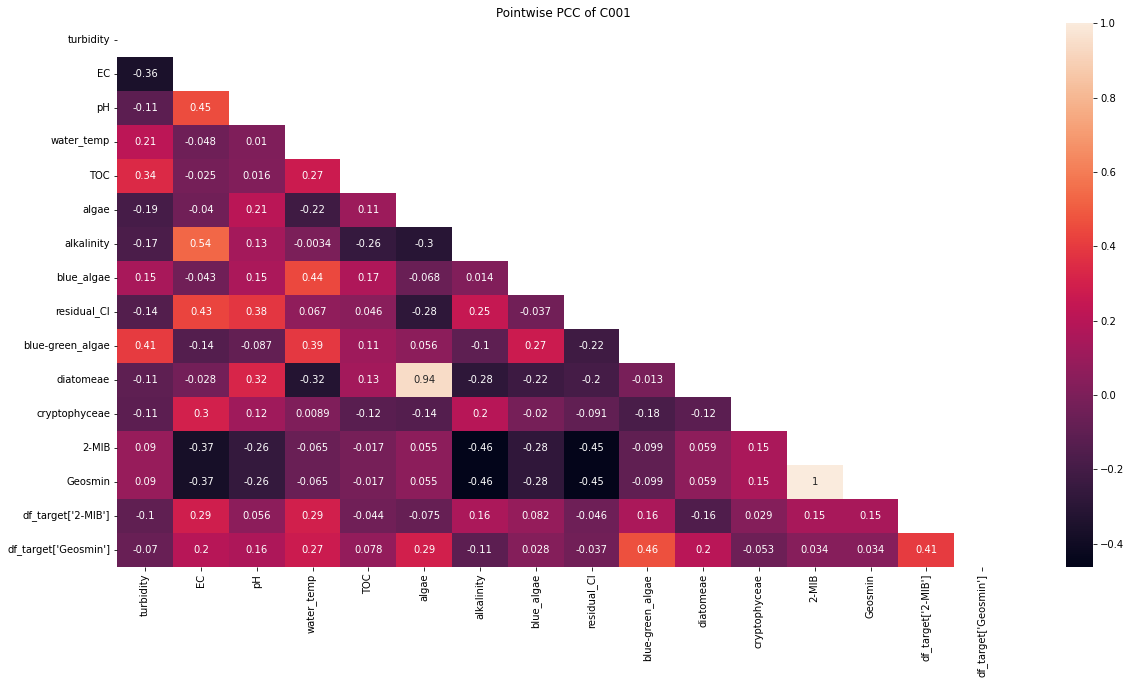

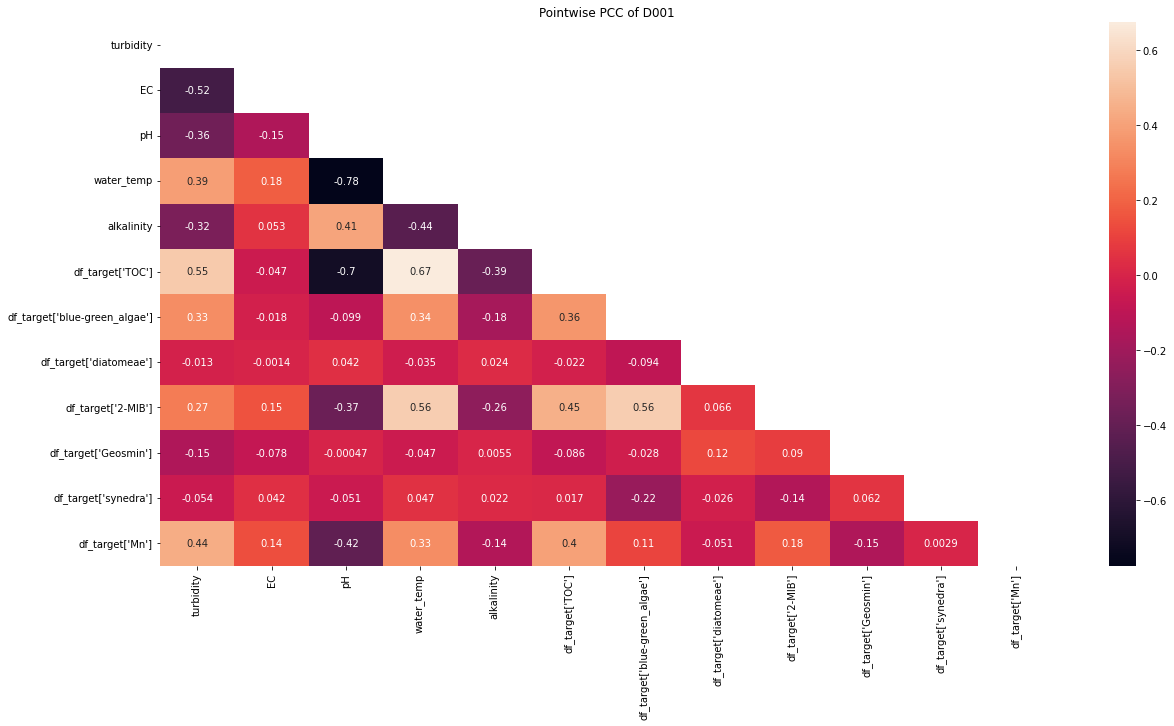

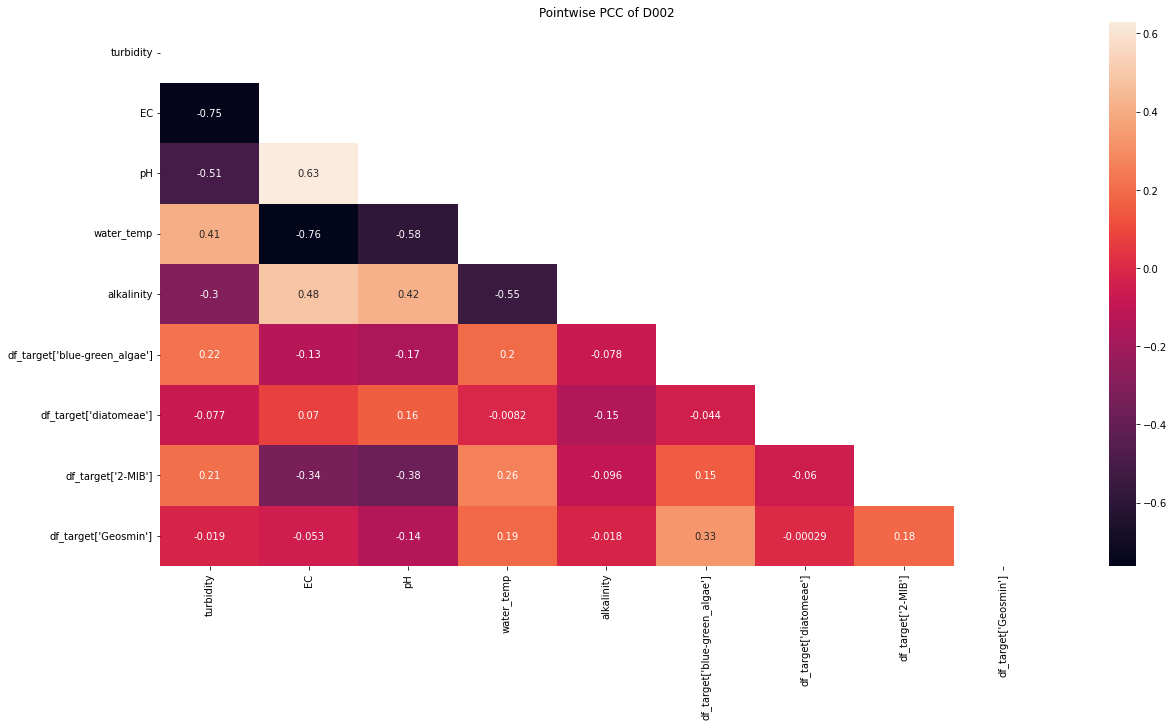

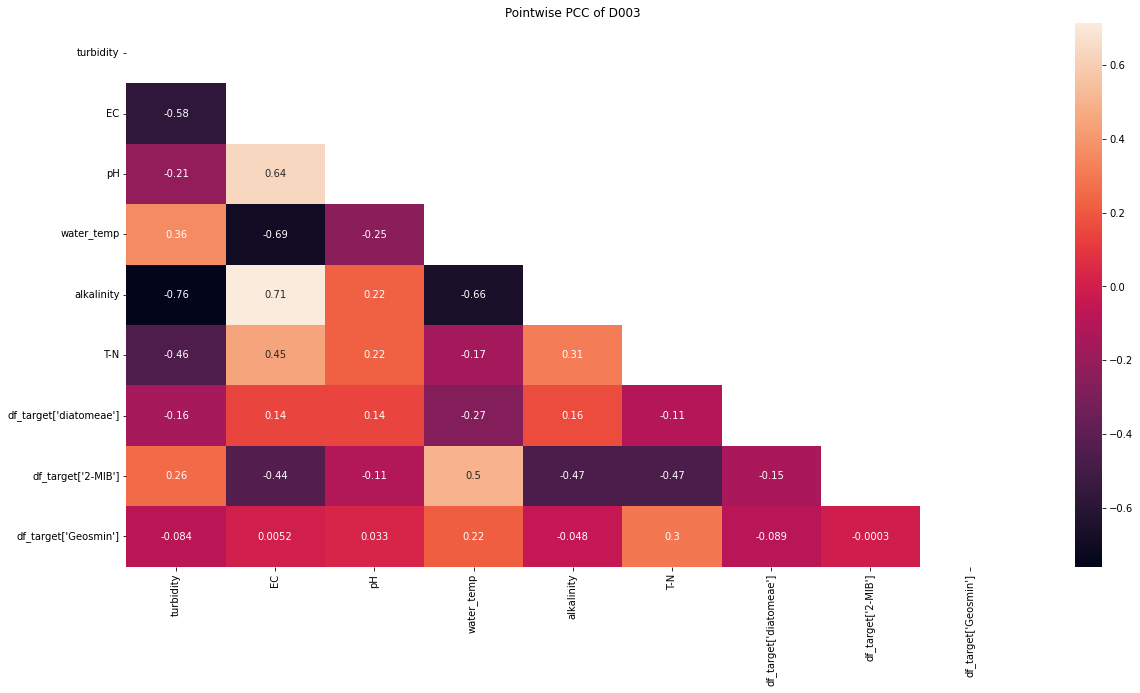

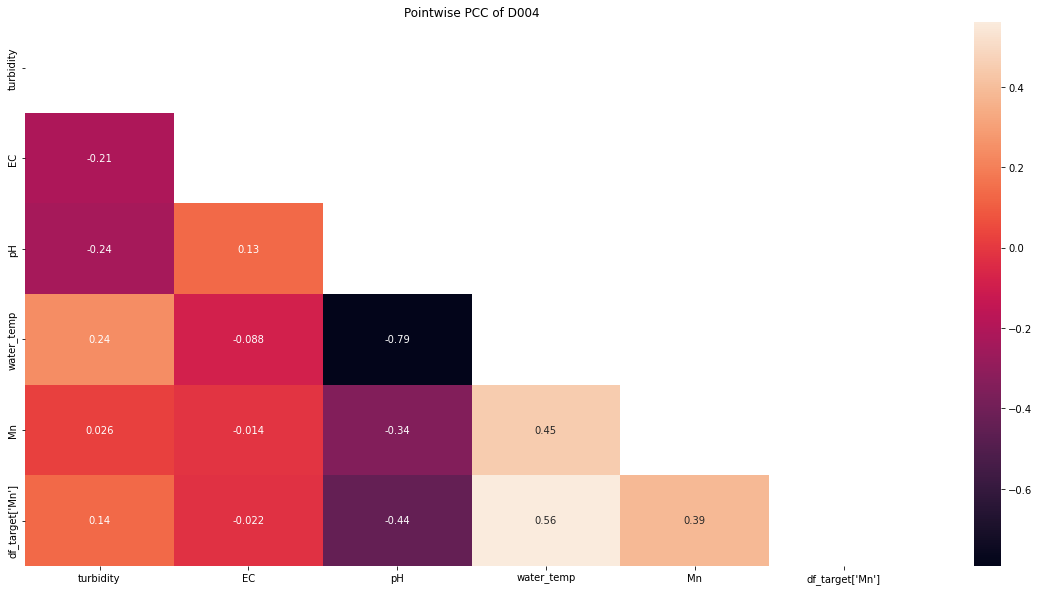

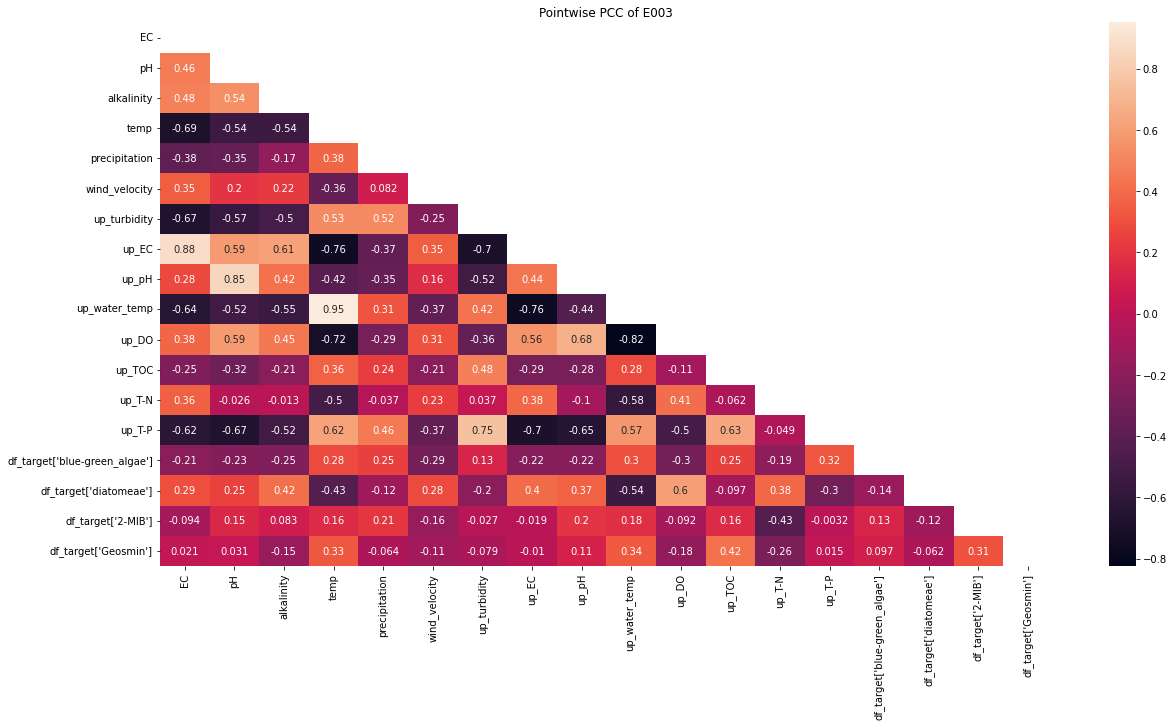

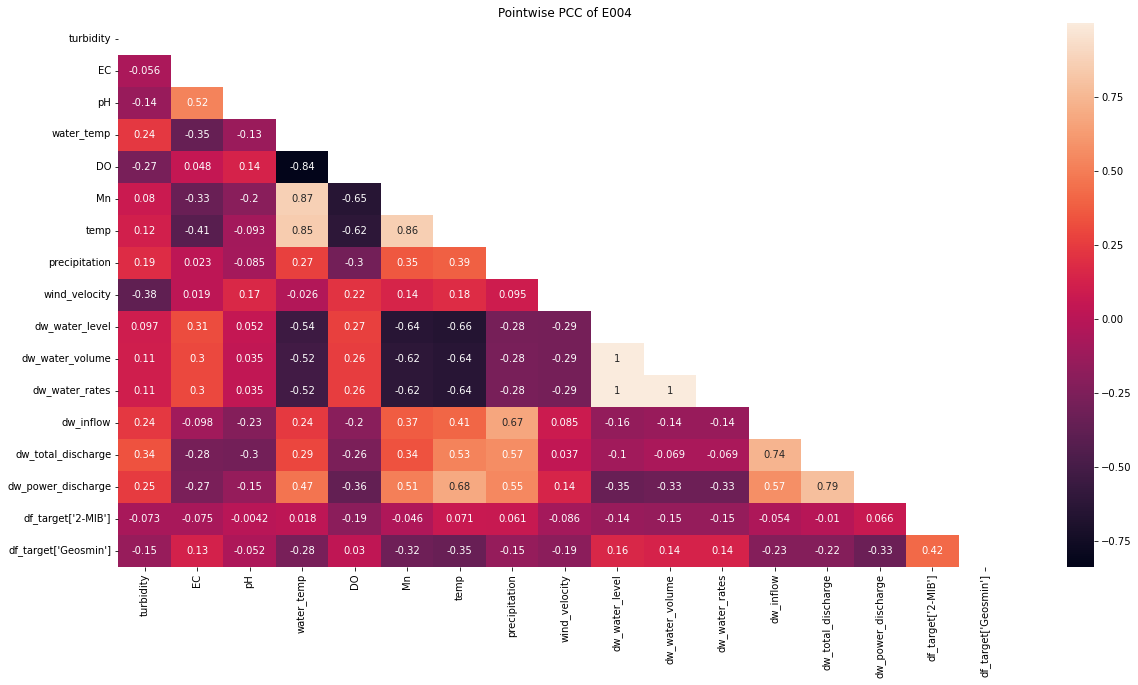

In [ ]:
for dir in dir_list:
    plot_heatmap(dir)